In [1]:
import numpy as np
import defs
import appynho

In [2]:
litho_types = defs.read_litho_types('../data/lito_code.csv')

In [3]:
# reading the files .LAS of all wells
# using the function "read_well" in the file "defs"
well_25 = defs.read_well('../data/7-MP-25-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB', 'DT', 'Lith_new'])
well_34 = defs.read_well('../data/7-MP-34D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB', 'DT', 'Lith_new'])
well_36 = defs.read_well('../data/7-MP-36D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB', 'DT', 'Lith_new'])
well_47 = defs.read_well('../data/7-MP-47DP-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB', 'DT', 'Lith_new'])

In [4]:
well_25['LITHOLOGY'] = well_25['Lith_new']
well_34['LITHOLOGY'] = well_34['Lith_new']
well_36['LITHOLOGY'] = well_36['Lith_new']
well_47['LITHOLOGY'] = well_47['Lith_new']

In [5]:
#setting top and base of the Maracangalha formation
top = 2500.00
base = 3100.00
step = 100.0
overlap = 0.00

In [6]:
# cutting all curves of all wells, selecting the top-base range
# using the function "formation_zone" in the file "defs"
formation_25 = defs.formation_zone(well_25, top, base)
formation_34 = defs.formation_zone(well_34, top, base)
formation_36 = defs.formation_zone(well_36, top, base)
formation_47 = defs.formation_zone(well_47, top, base)

In [7]:
#creating curves that only contains one lithology type, for each lithology
#using the function "separate_lithology" in the file "defs"
separate_25 = defs.separate_lithology(formation_25, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB', 'DT'])
separate_34 = defs.separate_lithology(formation_34, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB', 'DT'])
separate_36 = defs.separate_lithology(formation_36, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB', 'DT'])
separate_47 = defs.separate_lithology(formation_47, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB', 'DT'])

In [8]:
statistic_25 = defs.statistic_lithology(separate_25, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR', 'NPHI', 'RHOB', 'DT'], step, top, base, overlap)
statistic_34 = defs.statistic_lithology(separate_34, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR', 'NPHI', 'RHOB', 'DT'], step, top, base, overlap)
statistic_36 = defs.statistic_lithology(separate_36, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR', 'NPHI', 'RHOB', 'DT'], step, top, base, overlap)
statistic_47 = defs.statistic_lithology(separate_47, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR', 'NPHI', 'RHOB', 'DT'], step, top, base, overlap)

C:\Users\rmota\Documents\PFG_2020\codes\defs.py:393: RuntimeWarning: Mean of empty slice
  m = np.nanmean(curve_save[w])
c:\users\rmota\.conda\envs\tcc3\lib\site-packages\numpy\lib\nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [9]:
def create_database(statistics, lithology, curve):
    means = []
    stds = []
    for well in statistics:
        means.append(np.array(well[lithology][curve]['Mean']['Value']))
        stds.append(np.array(well[lithology][curve]['Std']['Value']))
        
    m = means[0]
    s = stds[0]
    for mean, std in zip(means[1:], stds[1:]):
        nans = np.array(list(map(np.isnan, m)))
        m[nans] = mean[nans]
        s[nans] = std[nans]
    
    return [list(m), list(s)]

In [10]:
tops = statistic_25['SANDSTONE']['GR']['Mean']['Top']
bases = statistic_25['SANDSTONE']['GR']['Mean']['Base']

In [11]:
lithology = ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE']
curves = ['GR', 'NPHI', 'RHOB', 'DT']
database = {}
for lith in lithology:
    database[lith] = {}
    for curve in curves:
        database[lith][curve] = {}
        database[lith][curve]['Mean'] = {}
        database[lith][curve]['Std'] = {}
        database[lith][curve]['Mean']['Top'] = tops
        database[lith][curve]['Mean']['Base'] = bases
        database[lith][curve]['Mean']['Value'] = create_database([statistic_25, statistic_34, statistic_36, statistic_47], lith, curve)[0]
        database[lith][curve]['Std']['Top'] = top
        database[lith][curve]['Std']['Base'] = base
        database[lith][curve]['Std']['Value'] = create_database([statistic_25, statistic_34, statistic_36, statistic_47], lith, curve)[1]

In [12]:
database

{'SANDSTONE': {'GR': {'Mean': {'Top': [2500.0,
     2600.0,
     2700.0,
     2800.0,
     2900.0,
     3000.0],
    'Base': [2600.0, 2700.0, 2800.0, 2900.0, 3000.0, 3100.0],
    'Value': [42.45825000000001,
     54.62703093093093,
     52.03819474789916,
     58.11447421875,
     59.96428966480447,
     51.96786580086581]},
   'Std': {'Top': 2500.0,
    'Base': 3100.0,
    'Value': [7.548743831473836,
     6.237445834054753,
     7.566038633732734,
     7.013943915655838,
     7.0891748393742695,
     7.838137028424732]}},
  'NPHI': {'Mean': {'Top': [2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.0],
    'Base': [2600.0, 2700.0, 2800.0, 2900.0, 3000.0, 3100.0],
    'Value': [0.14666071428571428,
     0.08699459459459459,
     0.09127205882352941,
     0.08533984374999999,
     0.07177039106145251,
     0.058600432900432896]},
   'Std': {'Top': 2500.0,
    'Base': 3100.0,
    'Value': [0.07942988974689617,
     0.01260295383059332,
     0.017523285731279654,
     0.020716292928125903,
  

In [13]:
well_55 = defs.read_well('../data/7-MP-55D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB', 'Lith_new'])
well_55['LITHOLOGY'] = well_55['Lith_new']
formation_55 = defs.formation_zone(well_55, top, base)
separate_55 = defs.separate_lithology(formation_55, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB'])

In [14]:
gr_sort_55 = defs.sort_curve(separate_55, database, litho_types, 'GR', step, top, base)

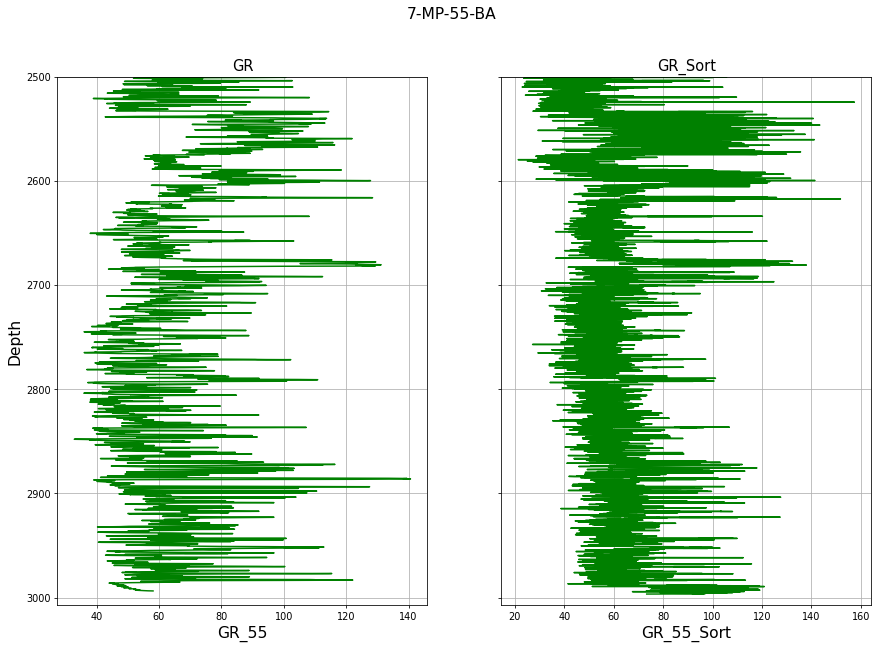

In [19]:
grafico = appynho.plotagem(2, titulo = '7-MP-55-BA', altura = 10, comprimento = 15 )
grafico.plot_s(0, separate_55['GR'], separate_55['DEPTH'], cor = 'g', descricao_x = 'GR_55', descricao_y = 'Depth', titulo = 'GR')
grafico.plot_s(1, gr_sort_55, separate_55['DEPTH'], cor = 'g', descricao_x = 'GR_55_Sort', descricao_y = 'Depth', titulo = 'GR_Sort')

In [16]:
nphi_sort_55 = defs.sort_curve(separate_55, database, litho_types, 'NPHI', step, top, base)

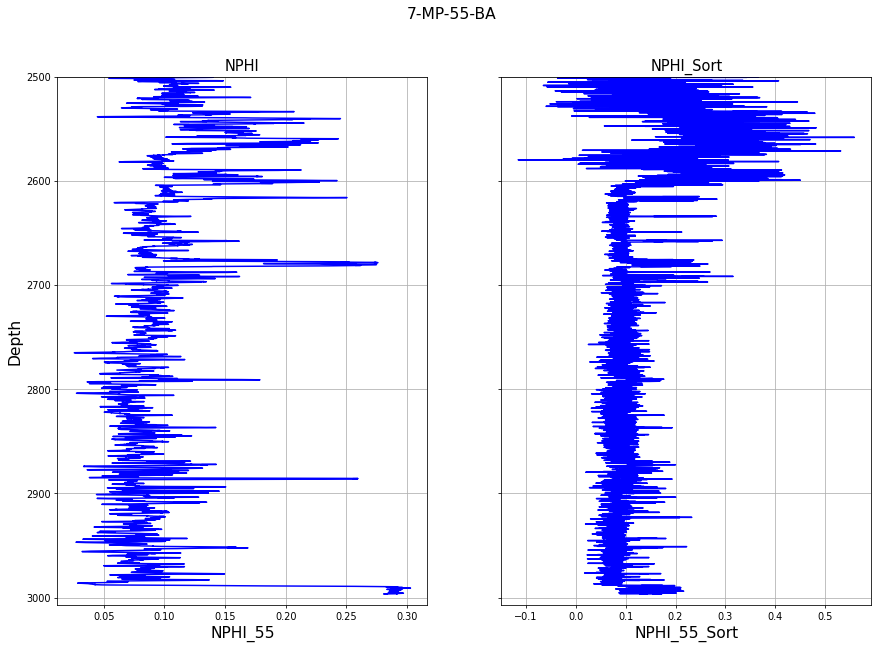

In [18]:
grafico = appynho.plotagem(2, titulo = '7-MP-55-BA', altura = 10, comprimento = 15 )
grafico.plot_s(0, separate_55['NPHI'], separate_55['DEPTH'], cor = 'b', descricao_x = 'NPHI_55', descricao_y = 'Depth', titulo = 'NPHI')
grafico.plot_s(1, nphi_sort_55, separate_55['DEPTH'], cor = 'b', descricao_x = 'NPHI_55_Sort', descricao_y = 'Depth', titulo = 'NPHI_Sort')